# KI·ªÇM TRA GI·ªÆA K·ª≤ - Image Classification
##TH√îNG TIN SINH VI√äN:
- Nguy·ªÖn H√πng Anh
- 21064051

#B√†i to√°n ph√¢n lo·∫°i ph∆∞∆°ng ti·ªán giao th√¥ng

T·ªïng quan: Th·ª±c hi√™n c√°c b∆∞·ªõc ƒë·ªÉ x√¢y d·ª±ng m·ªôt h·ªá th·ªëng h·ªçc m√°y cho b√†i to√°n ph√¢n lo·∫°i ph∆∞∆°ng ti·ªán giao th√¥ng: kh·∫£o s√°t d·ªØ li·ªáu, tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng, x√¢y d·ª±ng m√¥ h√¨nh ph√¢n lo·∫°i, ph√¢n lo·∫°i tr√™n h√¨nh ·∫£nh th·ª±c t·∫ø. Y√™u c·∫ßu c√°c ki·∫øn th·ª©c v·ªÅ l·∫≠p tr√¨nh Python v·ªõi c√°c th∆∞ vi·ªán: OpenCV, scikit-learn, pickle, numpy.

In [231]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import sklearn

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

## C√¢u h·ªèi 1: Kh·∫£o s√°t t·∫≠p d·ªØ li·ªáu
Th∆∞ m·ª•c trainingset bao g·ªìm 5 th∆∞ m·ª•c con ·ª©ng v·ªõi 5 nh√£n c·ªßa b√†i to√°n, trong m·ªói th∆∞ m·ª•c con ch·ª©a ·∫£nh t∆∞∆°ng ·ª©ng v·ªõi nh√£n.
### C√¢u h·ªèi 1.1: Quan s√°t m·ªôt v√†i m·∫´u d·ªØ li·ªáu
Vi·∫øt h√†m load_image() nh·∫≠n ƒë·∫ßu v√†o l√† ƒë∆∞·ªùng d·∫´n ·∫£nh, tr·∫£ v·ªÅ m·∫£ng numpy l∆∞u tr·ªØ ·∫£nh, s·ª≠ d·ª•ng th∆∞ vi·ªán OpenCV.

In [232]:
def load_image(image_path):
    #### YOUR CODE HERE ####
    return cv2.imread(image_path)
    #### END YOUR CODE #####

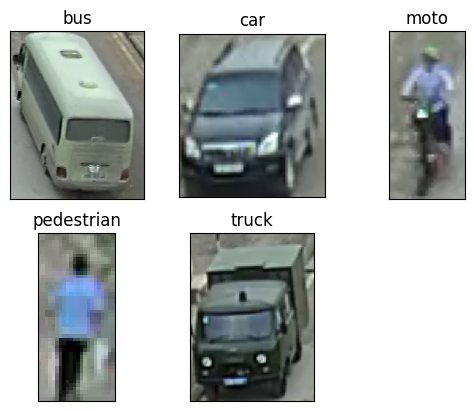

In [233]:
samples_list = []
samples_label = []

for label in os.listdir("../TK1/trainingset"):

    label_path = os.path.join("../TK1/trainingset", label)
    if not os.path.isdir(label_path):
        continue

    sample_file = os.listdir(os.path.join("../TK1/trainingset", label))[0]

    samples_list.append(load_image(os.path.join("../TK1/trainingset", label, sample_file)))

    samples_label.append(label)

for i in range(len(samples_list)):
    plt.subplot(2, 3, i + 1), plt.imshow(cv2.cvtColor(samples_list[i], cv2.COLOR_BGR2RGB))
    plt.title(samples_label[i]), plt.xticks([]), plt.yticks([])

plt.show()

M·ªôt v√†i h√†m hay s·ª≠ d·ª•ng trong th∆∞ vi·ªán os:
- H√†m os.listdir(path): Tr·∫£ v·ªÅ m·ªôt list ch·ª©a t√™n c√°c th∆∞ m·ª•c v√† file n·∫±m trong th∆∞ m·ª•c path. V√¨ h√†m tr·∫£ v·ªÅ m·ªôt list n√™n ta c√≥ th·ªÉ t√≠nh ƒë∆∞·ª£c t·ªïng s·ªë folder v√† file trong m·ªôt th∆∞ m·ª•c (d√πng h√†m len())
- H√†m os.path.join(t1, t2, [t3, ...]): Tr·∫£ v·ªÅ ƒë∆∞·ªùng d·∫´n trong h·ªá ƒëi·ªÅu h√†nh t∆∞∆°ng ·ª©ng n·ªëi c√°c ƒë∆∞·ªùng d·∫´n t1, t2, t3,... V√≠ d·ª• ta c√≥ t1 = 'trainingset', t2 = 'image' th√¨ h√†m tr·∫£ v·ªÅ x√¢u s = 'trainingset/image' v·ªõi Ubuntu ho·∫∑c s = 'trainingset\\image' v·ªõi Windows.

### C√¢u h·ªèi 1.2: Th·ªëng k√™ d·ªØ li·ªáu
H√£y vi·∫øt h√†m statistic() ƒë·ªÉ th·ªëng k√™ s·ªë l∆∞·ª£ng ·∫£nh ·ª©ng v·ªõi m·ªói nh√£n. H√†m statistic() c·∫ßn tr·∫£ v·ªÅ 2 danh s√°ch (list): label, num_images. Danh s√°ch label l∆∞u t√™n c√°c nh√£n v√† danh s√°ch num_images l∆∞u s·ªë l∆∞·ª£ng ·∫£nh t∆∞∆°ng ·ª©ng v·ªõi nh√£n l∆∞u ·ªü danh s√°ch label.

In [234]:
def statistic():
    label = []
    num_images = []

    for category in os.listdir("../TK1/trainingset"):
        category_path = os.path.join("../TK1/trainingset", category)

        if not os.path.isdir(category_path): 
            continue

        image_count = len([f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))])

        label.append(category)
        num_images.append(image_count)

    return label, num_images


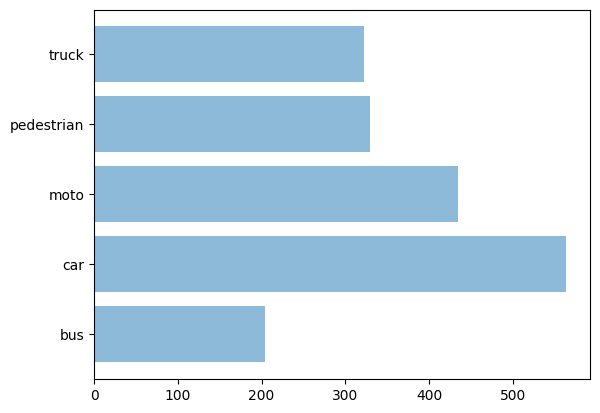

Total images: 1854


In [235]:
label, num_images = statistic()

y_pos = np.arange(len(label))

plt.barh(y_pos, num_images, align='center', alpha=0.5)
plt.yticks(y_pos, label)
plt.show()

print('Total images: %d' %(sum(num_images)))

### C√¢u h·ªèi 1.3: X√¢y d·ª±ng danh s√°ch ch·ª©a ·∫£nh

X√¢y d·ª±ng m·ªôt list l∆∞u tr·ªØ ·∫£nh v√† nh√£n t∆∞∆°ng ·ª©ng c·ªßa n√≥. H√£y Vi·∫øt h√†m read_data(), h√†m n√†y tr·∫£ v·ªÅ hai list X, Y, trong ƒë√≥ m·ªói ph·∫ßn t·ª≠ c·ªßa list X l∆∞u tr·ªØ m·ªôt m·∫£ng numpy bi·ªÉu di·ªÖn m·ªôt ·∫£nh v√† m·ªói ph·∫ßn t·ª≠ c·ªßa list Y l∆∞u tr·ªØ nh√£n (d∆∞·ªõi d·∫°ng s·ªë nguy√™n) t∆∞∆°ng ·ª©ng c·ªßa ·∫£nh.

In [236]:
def read_data(label2id):
    X = []
    Y = []
    for label in os.listdir('../TK1/trainingset'):
        label_path = os.path.join('../TK1/trainingset', label)
        if not os.path.isdir(label_path):  # B·ªè qua file kh√¥ng ph·∫£i th∆∞ m·ª•c
            continue
        for img_file in os.listdir(os.path.join('../TK1/trainingset', label)):
            img = cv2.imread(os.path.join('../TK1/trainingset', label, img_file))            
            X.append(img)
            Y.append(label2id[label])
    return X, Y

In [237]:
# Label to id, used to convert string label to integer 
label2id = {'pedestrian':0, 'moto':1, 'truck':2, 'car':3, 'bus':4}
X, Y = read_data(label2id)
print(len(X))
print(len(Y))
print(X[0].shape)
print(Y[0])

1854
1854
(168, 134, 3)
4


## C√¢u h·ªèi 2: Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng (features extraction)

Th·ª±c hi·ªán tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng SIFT (SIFT keypoints descriptor), x√¢y d·ª±ng t·ª´ ƒëi·ªÉn v√† m√¥ h√¨nh Bag-of-Word (BoW). B·∫°n h√£y l·∫≠p tr√¨nh ho√†n ch·ªânh c√°c h√†m theo y√™u c·∫ßu c·ª• th·ªÉ d∆∞·ªõi ƒë√¢y

### C√¢u h·ªèi 2.1: Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng SIFT

H√£y vi·∫øt h√†m extract_sift_features() nh·∫≠n ƒë·∫ßu v√†o l√† list ·∫£nh ta ƒë√£ x√¢y d·ª±ng ƒë∆∞·ª£c t·ª´ c√¢u h·ªèi tr∆∞·ªõc v√† tr·∫£ v·ªÅ list image_descriptors, ph·∫ßn t·ª≠ th·ª© p trong list image_descriptors l·∫°i l√† m·ªôt list ch·ª©a c√°c SIFT keypoints descriptor ·ª©ng v·ªõi ·∫£nh th·ª© p trong list X.

G·ª£i √Ω: ƒê·ªÉ kh·ªüi t·∫°o ƒë·ªëi t∆∞·ª£ng SIFT trong OpenCV ta s·ª≠ d·ª•ng l·ªánh: sift = cv2.xfeatures2d.SIFT_create(). ƒê·ªëi t∆∞·ª£ng n√†y c√≥ ph∆∞∆°ng th·ª©c detectAndCompute tr·∫£ v·ªÅ 2 outputs kp v√† des, kp l√† m·ªôt list ch·ª©a c√°c keypoints ƒë∆∞·ª£c detect b·ªüi SIFT, des l√† m·ªôt numpy array ch·ª©a len(kp) vectors 128 chi·ªÅu. Ch√∫ng ta s·∫Ω d√πng c√°c des n√†y ƒë·ªÉ ph·ª•c v·ª• b√†i to√°n ph√¢n lo·∫°i.

In [238]:
def extract_sift_features(X):
    image_descriptors = []
    sift = cv2.AKAZE_create()

    for i in range(len(X)):        
        kp, des = sift.detectAndCompute(X[i], None)
        if des is not None:
            image_descriptors.append(des)
        else:
            image_descriptors.append([np.zeros(61)])

    return image_descriptors

In [239]:
#import pickle

image_descriptors = extract_sift_features(X)
#pickle.dump(image_descriptors, open('img_des.dump', 'wb'))
#image_descriptors = pickle.load(open('img_des.dump', 'rb'))
print(len(image_descriptors))
if len(image_descriptors) > 0 and len(image_descriptors[0]) > 1:
    print(np.array(image_descriptors[0][1]).shape)
for i in range(10):
    print('Image {} has {} descriptors'.format(i, len(image_descriptors[i])))

1854
(61,)
Image 0 has 17 descriptors
Image 1 has 32 descriptors
Image 2 has 13 descriptors
Image 3 has 2 descriptors
Image 4 has 1 descriptors
Image 5 has 1 descriptors
Image 6 has 52 descriptors
Image 7 has 1 descriptors
Image 8 has 2 descriptors
Image 9 has 52 descriptors


### C√¢u h·ªèi 2.2: X√¢y d·ª±ng t·ª´ ƒëi·ªÉn
S·ª≠ d·ª•ng h√†m kmeans_bow() d∆∞·ªõi ƒë√¢y nh·∫≠n ƒë·∫ßu v√†o l√† m·ªôt list g·ªìm t·∫•t c·∫£ c√°c descriptors c·ªßa c√°c ·∫£nh trong t·∫≠p X v√† s·ªë c·ª•m num_clusters, s·ª≠ d·ª•ng thu·∫≠t to√°n KMeans trong scikit-learn ph√¢n c·ª•m c√°c vector descriptors n√†y th√†nh num_clusters c·ª•m. H√†m tr·∫£ v·ªÅ m·ªôt danh s√°ch center c·ªßa c√°c c·ª•m. V√¨ thao t√°c n√†y m·∫•t r·∫•t nhi·ªÅu th·ªùi gian n√™n ta s·∫Ω l∆∞u danh s√°ch tr·∫£ v·ªÅ b·ªüi h√†m kmeans_bow() ra m·ªôt file nh·ªã ph√¢n (s·ª≠ d·ª•ng th∆∞ vi·ªán pickle) ƒë·ªÉ ti·ªán s·ª≠ d·ª•ng sau n√†y.

Tr∆∞·ªõc ti√™n ta s·∫Ω x√¢y d·ª±ng m·ªôt list ch·ª©a t·∫•t c·∫£ c√°c descriptors:

In [240]:
all_descriptors = []
for descriptors in image_descriptors:
    if descriptors is not None:
        for des in descriptors:
            all_descriptors.append(des)
print('Total number of descriptors: %d' %(len(all_descriptors)))

Total number of descriptors: 37668


ƒê·ªëi t∆∞·ª£ng kmeans c√≥ ph∆∞∆°ng th·ª©c fit, nh·∫≠n v√†o c√°c ƒëi·ªÉm d·ªØ li·ªáu (trong b√†i to√°n hi·ªán t·∫°i c·ªßa ch√∫ng ta l√† list all_descriptors) v√† t√¨m ra n_clusters vector l√† t√¢m c·ªßa c√°c c·ª•m d·ªØ li·ªáu. ƒê·ªÉ l·∫•y ƒë∆∞·ª£c c√°c vector n√†y ta s·ª≠ d·ª•ng thu·ªôc t√≠nh $cluster_centers_$  c·ªßa ƒë·ªëi t∆∞·ª£ng kmeans

In [241]:
def kmeans_bow(all_descriptors, num_clusters):
    bow_dict = []

    kmeans = KMeans(n_clusters=num_clusters).fit(all_descriptors)
    bow_dict = kmeans.cluster_centers_

    return bow_dict

L∆∞u t·ª´ ƒëi·ªÉn ph·ª•c v·ª• cho vi·ªác s·ª≠ d·ª•ng sau n√†y:

In [242]:
num_clusters = 15

if not os.path.isfile('bow_dictionary.pkl'):
    BoW = kmeans_bow(all_descriptors, num_clusters)
    pickle.dump(BoW, open('bow_dictionary.pkl', 'wb'))
else:
    BoW = pickle.load(open('bow_dictionary.pkl', 'rb'))

# ƒê·∫£m b·∫£o BoW l√† m·∫£ng numpy 2D
BoW = np.array(BoW)
if BoW.ndim != 2:
    print(f"Error: BoW has incorrect shape {BoW.shape}, reshaping...")
    BoW = BoW.reshape(-1, 128)  # ƒêi·ªÅu ch·ªânh n·∫øu s·ªë chi·ªÅu ƒë·∫∑c tr∆∞ng kh√°c

print(f"BoW shape: {BoW.shape}")
print(f"BoW type: {type(BoW[0])}")

BoW shape: (15, 61)
BoW type: <class 'numpy.ndarray'>


### C√¢u h·ªèi 2.3: X√¢y d·ª±ng vector ƒë·∫∑c tr∆∞ng v·ªõi m√¥ h√¨nh BoW

S·ª≠ d·ª•ng h√†m create_features_bow() nh·∫≠n ƒë·∫ßu v√†o l√† list image_descriptors, list BoW v√† num_clusters ·ªü tr√™n, tr·∫£ v·ªÅ list X_features, trong ƒë√≥ ph·∫ßn t·ª≠ th·ª© p c·ªßa X_vectors l√† vector ƒë·∫∑c tr∆∞ng theo m√¥ h√¨nh BoW ·ª©ng v·ªõi ·∫£nh th·ª© p, t·∫≠p keypoint descriptors th·ª© p. H√£y ch√∫ √Ω s·ª± t∆∞∆°ng ·ª©ng c√°c ph·∫ßn t·ª≠ trong 4 danh s√°ch: X, Y, image_descriptors, X_features.

In [243]:
from scipy.spatial.distance import cdist

In [244]:
def create_features_bow(image_descriptors, BoW, num_clusters):
    X_features = []
    descriptor_dim = BoW.shape[1]  # L·∫•y s·ªë chi·ªÅu ƒë·∫∑c tr∆∞ng c·ªßa BoW

    for i in range(len(image_descriptors)):
        features = np.zeros(num_clusters, dtype=int)

        if image_descriptors[i] is None or len(image_descriptors[i]) == 0:
            print(f"Warning: image_descriptors[{i}] is empty or None")
            X_features.append(features)  # Th√™m vector 0 thay v√¨ b·ªè qua ho√†n to√†n
            continue

        image_descriptors[i] = np.array(image_descriptors[i])
        if image_descriptors[i].ndim == 1:
            image_descriptors[i] = image_descriptors[i].reshape(1, -1)
        elif image_descriptors[i].ndim != 2:
            print(f"Error: image_descriptors[{i}] has invalid shape {image_descriptors[i].shape}")
            X_features.append(features)  # Th√™m vector 0 n·∫øu l·ªói
            continue

        # Ki·ªÉm tra s·ªë chi·ªÅu ƒë·∫∑c tr∆∞ng c√≥ kh·ªõp v·ªõi BoW kh√¥ng
        if image_descriptors[i].shape[1] != descriptor_dim:
            print(f"Error: image_descriptors[{i}] has shape {image_descriptors[i].shape}, but BoW expects {descriptor_dim} features.")
            X_features.append(features)  # Th√™m vector 0 n·∫øu l·ªói
            continue

        # T√≠nh kho·∫£ng c√°ch v√† g√°n v√†o c·ª•m g·∫ßn nh·∫•t
        distance = cdist(image_descriptors[i], BoW)
        argmin = np.argmin(distance, axis=1)
        for j in argmin:
            features[j] += 1

        X_features.append(features)

    return np.array(X_features) if X_features else np.zeros((1, num_clusters))  # ƒê·∫£m b·∫£o kh√¥ng r·ªóng


In [245]:
X_features = create_features_bow(image_descriptors, BoW, num_clusters)
print(len(X_features))
print(X_features[0])
print(sum(X_features[0]))
print(image_descriptors[0].shape[0])

1854
[0 1 2 2 0 2 4 0 0 2 1 1 0 1 1]
17
17


## C√¢u h·ªèi 3: X√¢y d·ª±ng m√¥ h√¨nh
T·ª´ c√°c c√¢u h·ªèi tr∆∞·ªõc ch√∫ng ta ƒë√£ x√¢y d·ª±ng ƒë∆∞·ª£c vector ƒë·∫∑c tr∆∞ng ·ª©ng v·ªõi m·ªói ·∫£nh trong b·ªô d·ªØ li·ªáu. ·ªû c√¢u h·ªèi n√†y ch√∫ng ta s·∫Ω x√¢y d·ª±ng c√°c m√¥ h√¨nh ph√¢n lo·∫°i SVM

In [246]:
print(len(X_features))
print(len(Y))

1854
1854


Chia t·∫≠p d·ªØ li·ªáu th√†nh t·∫≠p train/test s·ª≠ d·ª•ng train_test_split c·ªßa sklearn:

In [247]:
from sklearn.model_selection import train_test_split

X_train = []
X_test = []
Y_train = []
Y_test = []

X_train, X_test, Y_train, Y_test = train_test_split(X_features, Y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

1483
371


Khai b√°o ƒë·ªëi t∆∞·ª£ng SVM:

In [248]:
svm = sklearn.svm.SVC(kernel='linear', C=1.0, random_state=42)
print(svm)

SVC(kernel='linear', random_state=42)


Hu·∫•n luy·ªán, ki·ªÉm tra ƒë·ªô ch√≠nh x√°c c·ªßa m√¥ h√¨nh t∆∞∆°ng t·ª± nh∆∞ c√°c b√†i h·ªçc tr∆∞·ªõc (s·ª≠ d·ª•ng c√°c h√†m fit, predict, score,... c·ªßa ƒë·ªëi t∆∞·ª£ng svm)

Hu·∫•n luy·ªán m√¥ h√¨nh:

In [249]:
svm.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

T√≠nh ƒë·ªô ch√≠nh x√°c tr√™n t·∫≠p d·ªØ li·ªáu hu·∫•n luy·ªán:

In [250]:
train_accuracy = svm.score(X_train, Y_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.5306810519217802


T√≠nh ƒë·ªô ch√≠nh x√°c tr√™n t·∫≠p d·ªØ li·ªáu test:

In [251]:
# T√≠nh ƒë·ªô ch√≠nh x√°c
print("Test Accuracy:",svm.score(X_test, Y_test))

Test Accuracy: 0.48247978436657685


## C√¢u h·ªèi 4: D√πng m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán d·ª± ƒëo√°n h√¨nh ·∫£nh th·ª±c t·∫ø

D√πng m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán ƒë·ªÉ ƒë∆∞a ra d·ª± ƒëo√°n v·ªÅ m·ªôt h√¨nh ·∫£nh th·ª±c t·∫ø. Th·ª±c hi·ªán l·∫ßn l∆∞·ª£t c√°c b∆∞·ªõc: ƒë·ªçc ·∫£nh, tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng BoW c·ªßa ·∫£nh, d·ª± ƒëo√°n s·ª≠ d·ª•ng m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán.

__B∆∞·ªõc 1__: ƒê·ªçc ·∫£nh ·ªü ƒë∆∞·ªùng d·∫´n image_test/car.png, l∆∞u ·∫£nh v√†o bi·∫øn img

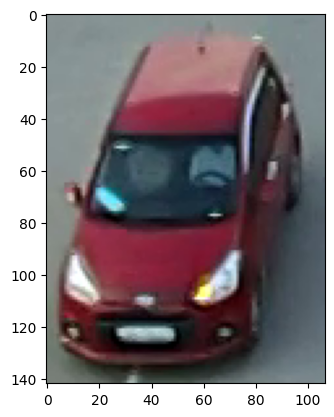

In [252]:
img = None

image_path = "../TK1/image_test/car.png"
img = cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

my_X = [img]

__B∆∞·ªõc 2__: Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng SIFT (l∆∞u v√†o bi·∫øn my_image_descriptors) v√† BoW (l∆∞u v√†o bi·∫øn my_X_features) t·ª´ my_X:

In [253]:
my_image_descriptors = None
my_X_features = None



my_image_descriptors = extract_sift_features(my_X)

if my_image_descriptors is None or len(my_image_descriptors) == 0:
    print("Error: No descriptors extracted from images!")

my_X_features = create_features_bow(my_X, BoW, num_clusters)
if len(my_X_features) == 0:
    print("Error: create_features_bow() returned an empty array!")

print(len(my_image_descriptors))
print(my_X_features[0].shape)

Error: image_descriptors[0] has invalid shape (142, 107, 3)
1
(15,)


__B∆∞·ªõc 3:__ S·ª≠ d·ª•ng m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán ƒë·ªÉ d·ª± ƒëo√°n, k·∫øt qu·∫£ d·ª± ƒëo√°n l∆∞u v√†o bi·∫øn my_y_pred

In [254]:
y_pred = None

########################
#### YOUR CODE HERE ####
########################

print(y_pred)
print(label2id)
# Get your label name using label2id variable (define above)
if y_pred is None or len(y_pred) == 0:
    print("Error: y_pred is None or empty!")
else:
    for key, value in label2id.items():
        if value == y_pred[0]:
            print('Your prediction:', key)

None
{'pedestrian': 0, 'moto': 1, 'truck': 2, 'car': 3, 'bus': 4}
Error: y_pred is None or empty!


# C√¢u h·ªèi 5

1. Th·ª≠ nghi·ªám thu·∫≠t to√°n tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng BoW v·ªõi s·ªë l∆∞·ª£ng t·ª´ trong t·ª´ ƒëi·ªÉn kh√°c nhau 10, 20, 50, 100, 200. V·∫Ω bi·ªÉu ƒë·ªì ƒë·ªô ch√≠nh x√°c tr√™n t·∫≠p test ·ª©ng v·ªõi t·ª´ng tr∆∞·ªùng h·ª£p.

2. S·ª≠ d·ª•ng GridSearchCV c·ªßa sklearn ƒë·ªÉ t√¨m tham s·ªë t·ªët nh·∫•t cho m√¥ h√¨nh SVM.

3. Thay SVM b·∫±ng c√°c b·ªô ph√¢n lo·∫°i: K-Nearest Neighbors, Random forest. So s√°nh c√°c k·∫øt qu·∫£ v√† ƒë∆∞a ra nh·∫≠n x√©t.

1. Th·ª≠ nghi·ªám thu·∫≠t to√°n tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng BoW v·ªõi s·ªë l∆∞·ª£ng t·ª´ trong t·ª´ ƒëi·ªÉn kh√°c nhau 10, 20, 50, 100, 200. V·∫Ω bi·ªÉu ƒë·ªì ƒë·ªô ch√≠nh x√°c tr√™n t·∫≠p test ·ª©ng v·ªõi t·ª´ng tr∆∞·ªùng h·ª£p.

üîπ Testing with 10 clusters...
‚úÖ Accuracy with 10 clusters: 0.6226
üîπ Testing with 20 clusters...
‚úÖ Accuracy with 20 clusters: 0.6146
üîπ Testing with 50 clusters...
‚úÖ Accuracy with 50 clusters: 0.6739
üîπ Testing with 100 clusters...
‚úÖ Accuracy with 100 clusters: 0.6981
üîπ Testing with 200 clusters...
‚úÖ Accuracy with 200 clusters: 0.7197


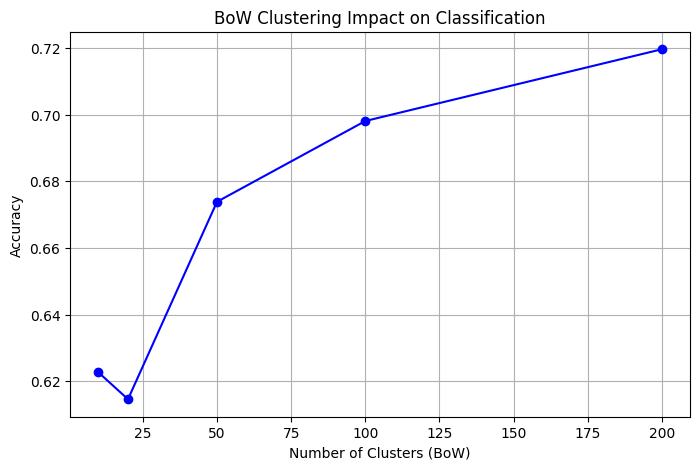

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

def load_images(image_folder):
    images, labels = [], []
    label_map = {}  # √Ånh x·∫° t√™n th∆∞ m·ª•c th√†nh nh√£n s·ªë

    for label_id, class_name in enumerate(os.listdir(image_folder)):
        class_path = os.path.join(image_folder, class_name)
        if not os.path.isdir(class_path):  # B·ªè qua n·∫øu kh√¥ng ph·∫£i th∆∞ m·ª•c
            continue

        label_map[class_name] = label_id  # L∆∞u √°nh x·∫° nh√£n
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (128, 128))
            images.append(img)
            labels.append(label_id)

    return np.array(images), np.array(labels), label_map

def evaluate_bow(num_clusters_list, X_train, y_train, X_test, y_test):
    accuracies = []

    for num_clusters in num_clusters_list:
        print(f"üîπ Testing with {num_clusters} clusters...")

        # T·∫°o t·ª´ ƒëi·ªÉn BoW
        BoW = kmeans_bow(train_descriptors, num_clusters)

        # Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng BoW
        X_train_features = create_features_bow(X_train, BoW, num_clusters)
        X_test_features = create_features_bow(X_test, BoW, num_clusters)

        # Train SVM
        model = SVC(kernel='linear', C=1.0, random_state=42)
        model.fit(X_train_features, y_train)

        # D·ª± ƒëo√°n v√† t√≠nh ƒë·ªô ch√≠nh x√°c
        y_pred = model.predict(X_test_features)
        acc = accuracy_score(y_test, y_pred)

        print(f"‚úÖ Accuracy with {num_clusters} clusters: {acc:.4f}")
        accuracies.append(acc)

    return accuracies

X, y, label_map = load_images("trainingset")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_descriptors = extract_sift_features(X_train)

num_clusters_list = [10, 20, 50, 100, 200]
accuracies = evaluate_bow(num_clusters_list, X_train, y_train, X_test, y_test)

plt.figure(figsize=(8, 5))
plt.plot(num_clusters_list, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Clusters (BoW)")
plt.ylabel("Accuracy")
plt.title("BoW Clustering Impact on Classification")
plt.grid(True)
plt.show()


Nh·∫≠n x√©t bi·ªÉu ƒë·ªì s·ª± t√°c ƒë·ªông c·ªßa s·ªë c·ª•m trong ph√¢n l·ªõp :
- ƒê·ªô ch√≠nh x√°c khi s·ªë l∆∞·ª£ng c·ª•m tƒÉng d·∫ßn t·ª´ 25% l√™n 72%

2. S·ª≠ d·ª•ng GridSearchCV c·ªßa sklearn ƒë·ªÉ t√¨m tham s·ªë t·ªët nh·∫•t cho m√¥ h√¨nh SVM.

In [259]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# üü¢ 1. X√°c ƒë·ªãnh l∆∞·ªõi tham s·ªë c·∫ßn th·ª≠ nghi·ªám
param_grid = {
    'C': [0.1, 1, 10, 100],         # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Gamma ch·ªâ √°p d·ª•ng cho RBF/POLY
}

# üü¢ 2. Kh·ªüi t·∫°o m√¥ h√¨nh SVM
svm_model = SVC(random_state=42)
 # T·∫°o t·ª´ ƒëi·ªÉn BoW
BoW = kmeans_bow(train_descriptors, num_clusters)


# Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng BoW
X_train_features = create_features_bow(X_train, BoW, num_clusters)
X_test_features = create_features_bow(X_test, BoW, num_clusters)

# üü¢ 3. Ch·∫°y GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_features, y_train)  # Hu·∫•n luy·ªán tr√™n d·ªØ li·ªáu ƒë·∫∑c tr∆∞ng BoW

# üü¢ 4. In ra k·∫øt qu·∫£ t·ªët nh·∫•t
print("Best parameters:", grid_search.best_params_)
print("Best training accuracy:", grid_search.best_score_)

# üü¢ 5. ƒê√°nh gi√° tr√™n t·∫≠p test v·ªõi m√¥ h√¨nh t·ªët nh·∫•t
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_features, y_test)
print("Test Accuracy with Best Parameters:", test_accuracy)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best training accuracy: 0.6905155155155154
Test Accuracy with Best Parameters: 0.6765498652291105


3. Thay SVM b·∫±ng c√°c b·ªô ph√¢n lo·∫°i: K-Nearest Neighbors, Random forest. So s√°nh c√°c k·∫øt qu·∫£ v√† ƒë∆∞a ra nh·∫≠n x√©t.

In [ ]:
num_clusters = 15

if not os.path.isfile('bow_dictionary.pkl'):
    BoW = kmeans_bow(all_descriptors, num_clusters)
    pickle.dump(BoW, open('bow_dictionary.pkl', 'wb'))
else:
    BoW = pickle.load(open('bow_dictionary.pkl', 'rb'))

# ƒê·∫£m b·∫£o BoW l√† m·∫£ng numpy 2D
BoW = np.array(BoW)
if BoW.ndim != 2:
    print(f"Error: BoW has incorrect shape {BoW.shape}, reshaping...")
    BoW = BoW.reshape(-1, 128)  # ƒêi·ªÅu ch·ªânh n·∫øu s·ªë chi·ªÅu ƒë·∫∑c tr∆∞ng kh√°c

print(f"BoW shape: {BoW.shape}")
print(f"BoW type: {type(BoW[0])}")

BoW shape: (15, 61)
BoW type: <class 'numpy.ndarray'>


K-Nearest Neighbors

üîç Extracting SIFT Features: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 371/371 [00:00<00:00, 428.57it/s]


üîπ Testing with 10 clusters...
üîπ Training BoW with 10 clusters...
‚úÖ KNN accuracy with 10 clusters: 0.6092
üîπ Testing with 20 clusters...
üîπ Training BoW with 20 clusters...
‚úÖ KNN accuracy with 20 clusters: 0.6550
üîπ Testing with 50 clusters...
üîπ Training BoW with 50 clusters...
‚úÖ KNN accuracy with 50 clusters: 0.6307
üîπ Testing with 100 clusters...
üîπ Training BoW with 100 clusters...
‚úÖ KNN accuracy with 100 clusters: 0.6226
üîπ Testing with 200 clusters...
üîπ Training BoW with 200 clusters...
‚úÖ KNN accuracy with 200 clusters: 0.5445


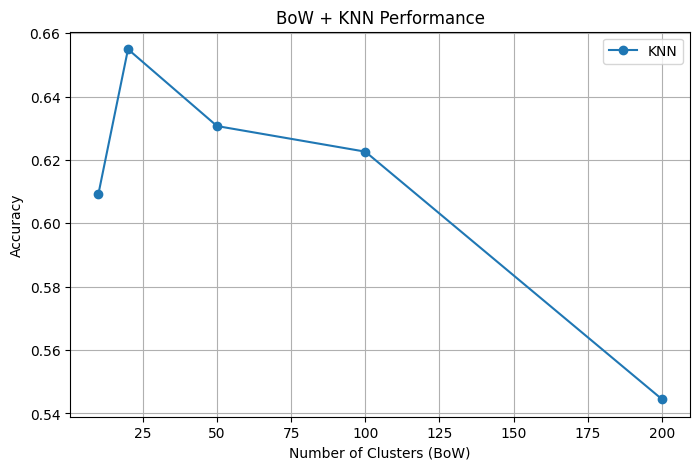

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def train_and_evaluate_knn(X_train, y_train, X_test, y_test):
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

def evaluate_bow_knn(num_clusters_list, X_train, y_train, X_test, y_test):
    knn_accuracies = []

    for num_clusters in num_clusters_list:
        print(f"üîπ Testing with {num_clusters} clusters...")

        BoW = kmeans_bow(all_descriptors_train, num_clusters)
        X_train_features = create_features_bow(image_descriptors_train, BoW, num_clusters)
        X_test_features = create_features_bow(image_descriptors_test, BoW, num_clusters)

        acc = train_and_evaluate_knn(X_train_features, y_train, X_test_features, y_test)
        knn_accuracies.append(acc)
        print(f"‚úÖ KNN accuracy with {num_clusters} clusters: {acc:.4f}")

    return knn_accuracies


# 1. Load d·ªØ li·ªáu
X, y, label_map = load_images("trainingset")

# 2. Chia t·∫≠p train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng SIFT
image_descriptors_train, all_descriptors_train = extract_sift_features(X_train)
image_descriptors_test, all_descriptors_test = extract_sift_features(X_test)

# 4. ƒê√°nh gi√° v·ªõi c√°c s·ªë l∆∞·ª£ng t·ª´ ƒëi·ªÉn kh√°c nhau
num_clusters_list = [10, 20, 50, 100, 200]
knn_accuracies = evaluate_bow_knn(num_clusters_list, X_train, y_train, X_test, y_test)

# 5. V·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£ KNN
plt.figure(figsize=(8, 5))
plt.plot(num_clusters_list, knn_accuracies, marker='o', linestyle='-', label="KNN")

plt.xlabel("Number of Clusters (BoW)")
plt.ylabel("Accuracy")
plt.title("BoW + KNN Performance")
plt.legend()
plt.grid(True)
plt.show()


Hi·ªáu su·∫•t KNN kh√¥ng tƒÉng theo s·ªë c·ª•m:

- ƒê·ªô ch√≠nh x√°c cao nh·∫•t ·ªü kho·∫£ng 20 c·ª•m (~66%).
- Khi s·ªë c·ª•m tƒÉng l√™n 50, 100, 200, ƒë·ªô ch√≠nh x√°c gi·∫£m d·∫ßn.

Random forest

üîç Extracting SIFT Features: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 371/371 [00:00<00:00, 425.97it/s]


üîπ Testing with 10 clusters using Random Forest...
üîπ Training BoW with 10 clusters...
‚úÖ Accuracy with 10 clusters: 0.6685
üîπ Testing with 20 clusters using Random Forest...
üîπ Training BoW with 20 clusters...
‚úÖ Accuracy with 20 clusters: 0.7035
üîπ Testing with 50 clusters using Random Forest...
üîπ Training BoW with 50 clusters...
‚úÖ Accuracy with 50 clusters: 0.7466
üîπ Testing with 100 clusters using Random Forest...
üîπ Training BoW with 100 clusters...
‚úÖ Accuracy with 100 clusters: 0.7736
üîπ Testing with 200 clusters using Random Forest...
üîπ Training BoW with 200 clusters...
‚úÖ Accuracy with 200 clusters: 0.7224


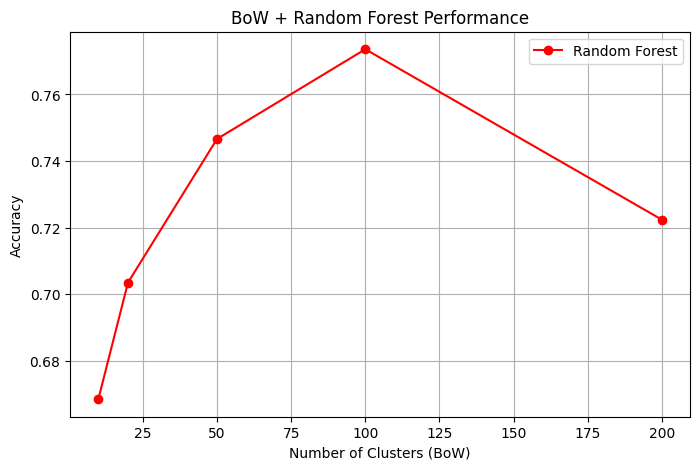

In [ ]:
from sklearn.ensemble import RandomForestClassifier


def evaluate_bow_with_rf(num_clusters_list, all_descriptors, X_train_desc, y_train, X_test_desc, y_test):
    accuracies = []
    
    for num_clusters in num_clusters_list:
        print(f"üîπ Testing with {num_clusters} clusters using Random Forest...")

        # T·∫°o BoW dictionary
        BoW = kmeans_bow(all_descriptors, num_clusters)
        if BoW is None:
            accuracies.append(0)  # N·∫øu kh√¥ng ƒë·ªß ƒë·∫∑c tr∆∞ng, th√™m 0 v√†o danh s√°ch accuracy
            continue  

        # Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng BoW
        X_train_features = create_features_bow(X_train_desc, BoW, num_clusters)
        X_test_features = create_features_bow(X_test_desc, BoW, num_clusters)

        # Train Random Forest
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train_features, y_train)

        # D·ª± ƒëo√°n
        y_pred = model.predict(X_test_features)

        # T√≠nh accuracy
        acc = accuracy_score(y_test, y_pred)
        print(f"‚úÖ Accuracy with {num_clusters} clusters: {acc:.4f}")
        accuracies.append(acc)

    return accuracies



image_folder = "trainingset"  # C·∫≠p nh·∫≠t ƒë∆∞·ªùng d·∫´n dataset
images, labels, label_map = load_images(image_folder)

# Chia t·∫≠p train/test
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42, stratify=labels)

# Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng SIFT
X_train_desc, all_descriptors_train = extract_sift_features(X_train)
X_test_desc, _ = extract_sift_features(X_test)  # Kh√¥ng c·∫ßn gom c·ª•m test

# Danh s√°ch s·ªë c·ª•m th·ª≠ nghi·ªám
num_clusters_list = [10, 20, 50, 100, 200]

# Ch·∫°y th·ª≠ nghi·ªám v·ªõi Random Forest
accuracies_rf = evaluate_bow_with_rf(num_clusters_list, all_descriptors_train, X_train_desc, y_train, X_test_desc, y_test)

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(8, 5))
plt.plot(num_clusters_list, accuracies_rf, marker='o', linestyle='-', label="Random Forest", color='r')
plt.xlabel("Number of Clusters (BoW)")
plt.ylabel("Accuracy")
plt.title("BoW + Random Forest Performance")
plt.legend()
plt.grid(True)
plt.show()


Nh·∫≠n x√©t: 
- Xu h∆∞·ªõng h·ª£p l√Ω: Accuracy tƒÉng d·∫ßn khi s·ªë c·ª•m tƒÉng t·ª´ 10 ƒë·∫øn 100, ƒëi·ªÅu n√†y cho th·∫•y vi·ªác s·ª≠ d·ª•ng nhi·ªÅu c·ª•m h∆°n gi√∫p m√¥ h√¨nh ph√¢n bi·ªát ƒë·∫∑c tr∆∞ng t·ªët h∆°n.
- ƒêi·ªÉm t·ªëi ∆∞u: V·ªõi 100 clusters, accuracy ƒë·∫°t cao nh·∫•t (~0.77), cho th·∫•y ƒë√¢y c√≥ th·ªÉ l√† s·ªë c·ª•m t·ªëi ∆∞u.

#### End